# COGS 108 - Mental Disorder, Education Level, Race, and Occupation's Effects on Fatal Overdose

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

Video link: https://drive.google.com/file/d/10dAvfUYP8K_vavzmmdAcGfS9ZQklkzU9/view?usp=sharing

# Overview

We analyzed the effects of mental illness, race, age, occupation, and education level on the rate of fatal drug overdose in the 2020 population of individuals aged 12 - 65. We determined that while race does not have an effect, age and occupation have an effect with most decedents being between the ages of 30-40 and working as construction workers, housewives, and transportation services. Education only has a significant effect when broken down by age. Finally, mental illness showed no significant effect when considering overdoses in decedents listed as having pre-existing/naturally occurring mental illnesses; however, when considering the categories of mental illnesses caused by drug abuse, there is a significant effect. 

# Names

- Kimberly Johnson
- Lesly Naveda
- Yu-Shu Chen
- Duha Kim

<a id='table_of_contents'></a>

# Table of Contents

- [Research Question](#research_question)
  - [Background & Prior Work](#background_&_prior_work)
- [Hypothesis](#hypothesis)
- [Dataset](#dataset)
- [Setup](#setup)
- [Data Cleaning](#data_cleaning)
- [Data Analysis & Results](#data_analysis_&_results)
- [Ethics & Privacy](#ethics_&_privacy)
- [Conclusion & Discussion](#conclusion_&_discussion)
- [Team Contributions](#team_contributions)

<a id='research_question'></a>

# Research Question

Is there a known variable that can be conclusively linked to an increased risk of fatal overdose in the population? Our research will investigate the effects of mental health disorders, race, age, education level, and occupation on the rate of fatal overdose in the population of individuals aged 12-65. 

\*Mental health disorders and cause of death are derived from the medical certification portion of the death certificate and are encoded using the Tenth Revision of the International Classification of Diseases (ICD-10)  
\*Education levels are encoded from 1-9, 8th grade or less, 9-12 no diploma, high school graduate or GED, some college no degree, Associates, Bachelors, Masters, Doctorate, Unknown  
\*There are several codes for race due to modifications that were made to accommodate reporting more than one race. All races are as defined by the US Census Bureau.  
\*Occupation data are encoded by the US Census Bureau and the National Institute for Occupational Safety and Health

[Back to top](#research_question)

<a id='background_&_prior_work'></a>

## Background & Prior Work

Substance abuse is a prevalent issue that negatively affects the overall health and well being of millions of people worldwide. Furthermore, substance abuse leading to fatal overdose has been increasing at an alarming rate. According to the Centers for Disease Control and Prevention website, “in 2020, the rate of drug overdose deaths accelerated and increased 31% from the year before." We want to investigate the effects of mental health disorders, age, race, education level, and occupation on the rate of fatal overdose to determine if any of these variables have a significant effect. Identifying potential variables that are conclusively linked to fatal overdose is beneficial to raising awareness and developing prevention programs to help support individuals who are potentially at risk. 

References:
1. https://medicalxpress.com/news/2022-01-link-mental-health-substance-abuse.html
2. https://drugabusestatistics.org/#:~:text=Substance%20Abuse%20Statistics,drugs%20within%20the%20last%20year
3. https://www.nami.org/mhstats
4. https://www.healthdirect.gov.au/types-of-mental-illness

[Back to top](#background_&_prior_work)

<a id='hypothesis'></a>

# Hypothesis

We hypothesize that the strongest correlation will exist between mental health disorders and increased fatal overdose. The reason for this, is mental health disorders often cause an imbalance in neurotransmitters, which can lead to increased potential of drug abuse. With the potential for an increased chance of drug abuse, we expect there to be an increased risk of fatal overdose. 

[Back to top](#hypothesis)

<a id='dataset'></a>

# Dataset

- Dataset Name: Mortality Multiple Cause Files U.S. Data  (.zip files) 2020
- Link to the dataset: https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2020us.zip
- Link to the user's guide: https://www.cdc.gov/nchs/data/dvs/Multiple-Cause-Record-Layout-2020.pdf
- Number of observations: 3390278

This dataset contains every death recorded in 2020 in the United States of America and includes the underlying cause of death and all documented medical conditions known at the time of death. Knowing about each condition present at death will enable us to determine if mental health disorders are prevalent in instances of death by fatal overdose. Other variables we had initially hoped to consider were city and state of death, along with family health history. However, this information is not readily available due to privacy concerns, so we will be focusing on race, age, occupation, and education level as other variables and investigating their effects on the rate of fatal overdose within the population of 12 - 65 year olds. 

[Back to top](#dataset)

<a id='setup'></a>

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare

[Back to top](#setup)

<a id='data_cleaning'></a>

# Data Cleaning

Loading data from the csv file that we filtered by valid age range. 

In [2]:
df = pd.read_csv('removedRecordAxis.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.drop(df.columns[0], axis=1, inplace=True)

df.head()

,education,education_flag,sex,detail_age,marital_status,manner_of_death,underlying_ICD_code,num_entity_conditions,entity_axis_cond_1,entity_axis_cond_2,entity_axis_cond_3,entity_axis_cond_4,entity_axis_cond_5,entity_axis_cond_6,entity_axis_cond_7,entity_axis_cond_8,entity_axis_cond_9,entity_axis_cond_10,entity_axis_cond_11,entity_axis_cond_12,entity_axis_cond_13,entity_axis_cond_14,entity_axis_cond_15,entity_axis_cond_16,entity_axis_cond_17,entity_axis_cond_18,entity_axis_cond_19,entity_axis_cond_20,race,hispanic,hispanic_recode,race_recode_40,occupation,occupation_recode
0,6,1,M,1064,S,2,X74,4,11S299,21S219,22X74,61T141,,,,,,,,,,,,,,,,,1,100,6,1,1010,03
1,4,1,F,1039,D,2,X74,4,11S069,21S019,22X74,61T141,,,,,,,,,,,,,,,,,1,100,6,1,3649,11
2,3,1,F,1059,S,7,C139,4,11C139,61C845,62F109,63F179,,,,,,,,,,,,,,,,,2,100,7,2,9620,22
3,3,1,M,1020,S,2,X74,3,11S019,12X74,61T141,,,,,,,,,,,,,,,,,,3,100,8,3,3800,12
4,5,1,F,1058,M,7,C349,2,11C349,61F179,,,,,,,,,,,,,,,,,,,1,100,6,1,9010,26


Here we define functions to decode each column according to the user's guide. 

In [3]:
def standardize_education(education):
    if education == 1:
        return "8th grade or less"
    elif education == 2:
        return "9 - 12th grade, no diploma"
    elif education == 3:
        return "high school graduate or GED completed"
    elif education == 4:
        return "some college credit, but no degree"
    elif education == 5:
        return "Associate degree"
    elif education == 6:
        return "Bachelor’s degree"
    elif education == 7:
        return "Master’s degree"
    elif education == 8:
        return "Doctorate or professional degree"
    else:
        return np.nan

def standardize_sex(sex):
    if sex == "M":
        return "Male"
    else:
        return "Female"

def standardize_age(age):
    return age - 1000

def standardize_marital_status(marital_status):
    if marital_status == "S":
        return "Never married, single"
    elif marital_status == "M":
        return "Married"
    elif marital_status == "W":
        return "Widowed"
    elif marital_status == "D":
        return "Divorced"
    else:
        return np.nan

def standardize_manner_of_death(manner_of_death):
    if manner_of_death == '1':
        return "Accident"
    elif manner_of_death == '2':
        return "Suicide"
    elif manner_of_death == '3':
        return "Homicide"
    elif manner_of_death == '4':
        return "Pending investigation"
    elif manner_of_death == '5':
        return "Could not determine"
    elif manner_of_death == '6':
        return "Self-Inflicted"
    elif manner_of_death == '7':
        return "Natural"
    else:
        return np.nan

'''
  icd_keep_range, parse_icd_10, strip_numbers, and remove_line_numbers
  are used to decode the following columns, which all use ICD 10 codes:
  underlying_ICD_code, entity_axis_cond_1, entity_axis_cond_2, entity_axis_cond_3, entity_axis_cond_4,
  entity_axis_cond_5, entity_axis_cond_6, entity_axis_cond_7, entity_axis_cond_8, entity_axis_cond_9,
  entity_axis_cond_10, entity_axis_cond_11, entity_axis_cond_12, entity_axis_cond_13, entity_axis_cond_14,
'''

# Keeps all ICD 10 codes that fall within the desired ranges. 
def icd_keep_range(icd_list, range_list):
    # list to hold icd codes that fall in desired ranges
    icd_to_keep = []

    # iterate over each icd in the input list
    for icd in icd_list:
        icd = icd.strip()

        # if icd code integer portion begins with 0, remove it
        icd_num = int(icd[1:3]) if icd[1] != 0 else int(icd[2])

        # check each range list for the icd integer code and if it is found, add the
        # icd code to the list
        for a_range in range_list:
            if icd_num in a_range:
                icd_to_keep.append(icd)
    return icd_to_keep

# Parse the underlying conditions column to keep only the icd codes and ranges that contain 
# mental illness, substance abuse, accidents and covid (in case we want to use it in comparisons 
# since some of the original variables we proposed are not available due to ethical concerns. 
def parse_icd_10(df):
    # grab all rows with ICD codes for accidents, mental health, poisoning, external factors, etc
    # REMOVED COVID VALUE U
    subsets = df[df['underlying_ICD_code'].str.startswith(('F', 'X', 'Y', 'Z'))]

    # a list of the codes to keep
    codes_to_keep = []

    # start investigating each category to build an exclude list, all values in F(mental disorders) are valid
    # U is covid

    # get unique values for columns of interest
    unique_underlying_ICD = subsets['underlying_ICD_code'].unique()

    # all f codes
    mental_subset_f = subsets[subsets['underlying_ICD_code'].str.startswith('F')]
    mental_unique_f = mental_subset_f['underlying_ICD_code'].unique().tolist()
    codes_to_keep.extend(mental_unique_f)

    # covid subset
    #covid_subset_u = subsets[subsets['underlying_ICD_code'].str.startswith('U')]
    #covid_unique_u = covid_subset_u['underlying_ICD_code'].unique().tolist()
    #codes_to_keep.extend(covid_unique_u)

    # investigate poisoning category X------------------------------------------------------------
    poison_subset_x = subsets[subsets['underlying_ICD_code'].str.startswith('X')]

    # make sure to convert the uniques to a list, they are a numpy array
    poison_unique_x = poison_subset_x['underlying_ICD_code'].unique().tolist()

    # ----------To use the icd_keep_range function, create a list of ranges of type list----------
    ranges_for_x = [list(range(41, 44)), list(range(61, 64))]
    # --------------------------------------------------------------------------------------------

    # call the icd_keep_range function to keep all icds in the specified range
    poison_keep_x = icd_keep_range(poison_unique_x, ranges_for_x)
    codes_to_keep.extend(poison_keep_x)
    poison_subset_y = subsets[subsets['underlying_ICD_code'].str.startswith('Y')]
    poison_unique_y = poison_subset_y['underlying_ICD_code'].unique().tolist()
    ranges_for_y = [list(range(11, 15)), list(range(90, 92))]
    poison_keep_y = icd_keep_range(poison_unique_y, ranges_for_y)
    codes_to_keep.extend(poison_keep_y)

    # put spaces back in that have been removed from 3 letter codes
    for index in range(len(codes_to_keep)):
        if len(codes_to_keep[index]) == 3:
            codes_to_keep[index] = codes_to_keep[index] + ' '

    parsed_icd = subsets[subsets['underlying_ICD_code'].isin(codes_to_keep)]
    new_icd_uniques = parsed_icd['underlying_ICD_code'].unique()

    # reset index
    parsed_icd.reset_index(drop=True, inplace=True)
    return parsed_icd

# Remove the recodes for underlying cause of death because they are just less detailed groupings used by the NCHS 
# for counting purposes, and rename the underlying cause column. 
def refine_icd(df):
    # Only one column for underlying conditions is needed, the recodes solely serve the purpose of 
    # condensing the information for NCHS analysis and remove specific information
    df.rename(columns={'underlying_ICD_code':'underlying'}, inplace=True)
    return df

# Change the names of the entity and record axis columns to 'original' and 'computed' 
# because the names 'entity axis conditions' and 'record axis conditions' are confusing. 
def change_entity_and_record_names(df):
    # rename the columns
    df.rename(columns={'num_entity_conditions': 'num_original',
                       'entity_axis_cond_1': 'condition1',
                       'entity_axis_cond_2': 'condition2',
                       'entity_axis_cond_3': 'condition3',
                       'entity_axis_cond_4': 'condition4',
                       'entity_axis_cond_5': 'condition5',
                       'entity_axis_cond_6': 'condition6',
                       'entity_axis_cond_7': 'condition7',
                       'entity_axis_cond_8': 'condition8',
                       'entity_axis_cond_9': 'condition9',
                       'entity_axis_cond_10': 'condition10',
                       'entity_axis_cond_11': 'condition11',
                       'entity_axis_cond_12': 'condition12',
                       'entity_axis_cond_13': 'condition13',
                       'entity_axis_cond_14': 'condition14'
                      }, inplace=True)

    return df

# All entity axis condition codes have a 2 digit number preceding them which indicates their line on the death certificate. 
# Remove this number so that it is easy to search the ICD dict for corresponding string descriptions, if necessary. 
# The entity and record axis condition columns are sequential and the columns of the entity conditions 
# correspond to their lines on the death certificate so it is not necessary to keep the 2 digit prefix.
def strip_numbers(icd):
    # Strips the 2 digit number off of original/entity condition input. 
    icd = (str(icd)).strip()
    new_icd = icd[2:]
    return new_icd if len(new_icd) == 4 else new_icd + ' '
def remove_line_numbers(df):
    columns = ['condition1', 'condition2', 'condition3', 'condition4',
                'condition5', 'condition6', 'condition7', 'condition8',
                'condition9', 'condition10', 'condition11', 'condition12',
                'condition13', 'condition14']


    for column in columns:
        df[column] = df[column].apply(strip_numbers)
    return df

def standardize_icd(icd):
    icd = icd.strip()
    
    codes = {
              'F059': 'Delirium, not induced by alcohol and other psychoactive substances',
              'F069': 'Other mental disorders due to brain damage and dysfunction and to physical disease',
              'F101': 'Mental and behavioural disorders due to use of alcohol',
              'F102': 'Mental and behavioural disorders due to use of alcohol',
              'F103': 'Mental and behavioural disorders due to use of alcohol',
              'F109': 'Mental and behavioural disorders due to use of alcohol',
              'F111': 'Mental and behavioural disorders due to use of opioids',
              'F112': 'Mental and behavioural disorders due to use of opioids',
              'F119': 'Mental and behavioural disorders due to use of opioids',
              'F121': 'Mental and behavioural disorders due to use of cannabinoids',
              'F122': 'Mental and behavioural disorders due to use of cannabinoids',
              'F125': 'Mental and behavioural disorders due to use of cannabinoids',
              'F129': 'Mental and behavioural disorders due to use of cannabinoids',
              'F131': 'sedatives or hypnotics:harmful use',
              'F139': 'sedatives or hypnotics:unspecified',
              'F141': 'cMental and behavioural disorders due to use of cocaine',
              'F149': 'Mental and behavioural disorders due to use of cocaine',
              'F151': 'Mental and behavioural disorders due to use of other stimulants, including caffeine',
              'F159': 'Mental and behavioural disorders due to use of other stimulants, including caffeine',
              'F164': 'Mental and behavioural disorders due to use of hallucinogen',
              'F169': 'Mental and behavioural disorders due to use of hallucinogen',
              'F179': 'Mental and behavioural disorders due to use of tobacco',
              'F181': 'Mental and behavioural disorders due to use of volatile solvents',
              'F191': 'Mental and behavioural disorders due to multiple drug use and use of other psychoactive substances',
              'F192': 'Mental and behavioural disorders due to multiple drug use and use of other psychoactive substances',
              'F199': 'Mental and behavioural disorders due to multiple drug use and use of other psychoactive substances',
              'F205': 'Schizophrenia',
              'F209': 'Schizophrenia',
              'F259': 'Schizoaffective disorders',
              'F29': 'Unspecified nonorganic psychosis',
              'F312': 'Bipolar affective disorder',
              'F319': 'Bipolar affective disorder',
              'F322': 'Depressive episode',
              'F329': 'Depressive episode',
              'F400': 'Phobic anxiety disorders',
              'F411': 'Other anxiety disorders',
              'F419': 'Other anxiety disorders',
              'F431': 'Reaction to severe stress, and adjustment disorders',
              'F432': 'Reaction to severe stress, and adjustment disorders',
              'F439': 'Reaction to severe stress, and adjustment disorders',
              'F489': 'Other neurotic disorders',
              'F500': 'Eating disorders',
              'F502': 'Eating disorders',
              'F509': 'Eating disorders',
              'F54': 'Psychological and behavioural factors associated with disorders or diseases classified elsewhere',
              'F79' : 'Unspecified mental retardation',
              'F819': 'Specific developmental disorders of scholastic skills',
              'F840': 'Pervasive developmental disorders',
              'F842': 'Pervasive developmental disorders',
              'F845': 'Pervasive developmental disorders',
              'F89': 'Unspecified disorder of psychological development',
              'F900': 'Hyperkinetic disorders',
              'F941': 'Disorders of social functioning with onset specific to childhood and adolescence',
              'F989': 'Other behavioural and emotional disorders with onset usually occurring in childhood and adolescence',
              'F99': 'Mental disorder, not otherwise specified',
              'T07': 'Unspecified multiple injuries',
              'T090': 'Other injuries of spine and trunk, level unspecified',
              'T10': 'Fracture of upper limb, level unspecified',
              'T141': 'Injury of unspecified body region',
              'T148': 'Injury of unspecified body region',
              'T149': 'Injury of unspecified body region',
              'T179': 'Foreign body in respiratory tract',
              'T372': 'Poisoning by other systemic anti-infectives and antiparasitics',
              'T391': 'Poisoning by nonopioid analgesics, antipyretics and antirheumatics',
              'T398': 'Poisoning by nonopioid analgesics, antipyretics and antirheumatics',
              'T401': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T402': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T403': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T404': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T405': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T406': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T407': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T408': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T409': 'Poisoning by narcotics and psychodysleptics [hallucinogens]',
              'T410': 'Poisoning by anaesthetics and therapeutic gases',
              'T411': 'Poisoning by anaesthetics and therapeutic gases',
              'T412': 'Poisoning by anaesthetics and therapeutic gases',
              'T421': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T423': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T424': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T426': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T427': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T428': 'Poisoning by antiepileptic, sedative-hypnotic and antiparkinsonism drugs',
              'T430': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T432': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T433': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T434': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T435': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T436': 'Poisoning by psychotropic drugs, not elsewhere classified',
              'T447': 'Poisoning by drugs primarily affecting the autonomic nervous system',
              'T449': 'Poisoning by drugs primarily affecting the autonomic nervous system',
              'T450': 'Poisoning by primarily systemic and haematological agents, not elsewhere classified',
              'T461': 'Poisoning by agents primarily affecting the cardiovascular system',
              'T465': 'Poisoning by agents primarily affecting the cardiovascular system',
              'T481': 'Poisoning by agents primarily acting on smooth and skeletal muscles and the respiratory system',
              'T483': 'Poisoning by agents primarily acting on smooth and skeletal muscles and the respiratory system',
              'T505': 'Poisoning by diuretics and other and unspecified drugs, medicaments and biological substances',
              'T506': 'Poisoning by diuretics and other and unspecified drugs, medicaments and biological substances',
              'T509': 'Poisoning by diuretics and other and unspecified drugs, medicaments and biological substances',
              'T510': 'Toxic effect of alcohol',
              'T519': 'Toxic effect of alcohol',
              'T670': 'Effects of heat and light',
              'T679': 'Effects of heat and light',
              'T68': 'Hypothermia',
              'T699': 'Other effects of reduced temperature',
              'T71': 'Asphyxiation',
              'T751': 'Effects of other external causes',
              'T758': 'Effects of other external causes',
              'T817': 'Complications of procedures, not elsewhere classified',
              'T818': 'Complications of procedures, not elsewhere classified',
              'X40': 'Accidental poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics',
              'X41': 'Accidental poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified',
              'X42': 'Accidental poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified',
              'X44': 'Accidental poisoning by and exposure to other and unspecified drugs, medicaments and biological substances',
              'X45': 'Accidental poisoning by and exposure to alcohol',
              'X60': 'Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics',
              'X61': 'Intentional self-poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified',
              'X62': 'Intentional self-poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified',
              'X63': 'Intentional self-poisoning by and exposure to other drugs acting on the autonomic nervous system',
              'X64': 'Intentional self-poisoning by and exposure to other and unspecified drugs, medicaments and biological substances',
              'X65': 'Intentional self-poisoning by and exposure to alcohol',
              'X70': 'Intentional self-harm by hanging, strangulation and suffocation',
              'Y11': 'Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, undetermined intent',
              'Y12': 'Poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified, undetermined intent',
              'Y13': 'Poisoning by and exposure to other drugs acting on the autonomic nervous system, undetermined intent',
              'Y14': 'Poisoning by and exposure to other and unspecified drugs, medicaments and biological substances, undetermined intent',
              'Y15': 'Poisoning by and exposure to alcohol, undetermined intent'}
            
    categories = {
                  'F0': 'Organic, including symptomatic, mental disorders',
                  'F1': 'Mental Disorders due to drug use',
                  'F2': 'Schizophrenia, schizotype, delusional',
                  'F3': 'Mood Disorders',
                  'F4': 'Neurotic, stress-related, somatoform',
                  'F5': 'Behavioral Syndromes',
                  'F6': 'Adult personality disorder',
                  'F7': 'Mental Retardation',
                  'F8': 'Disorder of psychological development',
                  'F9': 'Behavioral and Emotional disorders or Unspecified',
                 }

    condition = codes.get(icd)

    # handle None values
    if condition is None:
        category = condition[0:2]
        categories.get(category)
        assert category is not None, f'ERROR {icd} HAS NO MATCHING CODE OR CATEGORY'.format(icd=icd)
        return category

    return condition

def standardize_race(race_recode_40):
    if race_recode_40 == 1:
        return "White"
    elif race_recode_40 == 2:
        return "Black"
    elif race_recode_40 == 3:
        return "American Indian or Alaskan Native (AIAN)"
    elif race_recode_40 == 4:
        return "Asian Indian"
    elif race_recode_40 == 5:
        return "Chinese"
    elif race_recode_40 == 6:
        return "Filipino"
    elif race_recode_40 == 7:
        return "Japanese"
    elif race_recode_40 == 8:
        return "Korean"
    elif race_recode_40 == 9:
        return "Vietnamese"
    elif race_recode_40 == 10:
        return "Other or Multiple Asian"
    elif race_recode_40 == 11:
        return "Hawaiian"
    elif race_recode_40 == 12:
        return "Guamanian"
    elif race_recode_40 == 13:
        return "Samoan"
    elif race_recode_40 == 14:
        return "Other or Multiple Pacific Islander"
    elif race_recode_40 == 15:
        return "Black and White"
    elif race_recode_40 == 16:
        return "Black and AIAN"
    elif race_recode_40 == 17:
        return "Black and Asian"
    elif race_recode_40 == 18:
        return "Black and Native Hawaiian or Other Pacific Islander (NHOPI)"
    elif race_recode_40 == 19:
        return "AIAN and White"
    elif race_recode_40 == 20:
        return "AIAN and Asian"
    elif race_recode_40 == 21:
        return "AIAN and NHOPI"
    elif race_recode_40 == 22:
        return "Asian and White"
    elif race_recode_40 == 23:
        return "Asian and NHOPI"
    elif race_recode_40 == 24:
        return "NHOPI and White"
    elif race_recode_40 == 25:
        return "Black, AIAN and White"
    elif race_recode_40 == 26:
        return "Black, AIAN and Asian"
    elif race_recode_40 == 27:
        return "Black, AIAN and NHOPI"
    elif race_recode_40 == 28:
        return "Black, Asian and White"
    elif race_recode_40 == 29:
        return "Black, Asian and NHOPI"
    elif race_recode_40 == 30:
        return "Black, NHOPI and White"
    elif race_recode_40 == 31:
        return "AIAN, Asian and White"
    elif race_recode_40 == 32:
        return "AIAN, NHOPI and White"
    elif race_recode_40 == 33:
        return "AIAN, Asian and NHOPI"
    elif race_recode_40 == 34:
        return "Asian, NHOPI and White"
    elif race_recode_40 == 35:
        return "Black, AIAN, Asian and White"
    elif race_recode_40 == 36:
        return "Black, AIAN, Asian and NHOPI"
    elif race_recode_40 == 37:
        return "Black, AIAN, NHOPI and White"
    elif race_recode_40 == 38:
        return "Black, Asian, NHOPI and White"
    elif race_recode_40 == 39:
        return "AIAN, Asian, NHOPI and White"
    elif race_recode_40 == 40:
        return "Black, AIAN, Asian, NHOPI and White Unknown and Other Race"
    else:
        return np.nan

def standardize_hispanic(hispanic):
    if hispanic in range(100, 200):
        return "Non – Hispanic"
    elif hispanic in range(200, 210):
        return "Spaniard"
    elif hispanic in range (210, 220):
        return "Mexican"
    elif hispanic in range (260, 270):
        return "Puerto Rican"
    elif hispanic in range(270, 275):
        return "Cuban"
    elif hispanic in range(275, 280):
        return "Dominican"
    elif hispanic == 220:
        return "Central and South American"
    elif hispanic in range(221, 231):
        return "Central American"
    elif hispanic in range(231, 249):
        return "South American"
    elif hispanic in range(250, 260):
        return "Latin American"
    elif hispanic in range(280, 300):
        return "Other Hispanic"
    elif hispanic in range(996, 1000):
        return "Unknown"
    else:
        return np.nan

def standardize_occupation(occupation_recode):
    if occupation_recode == '01':
        return "MANAGEMENT OCCUPATIONS"
    elif occupation_recode == '02':
        return "BUSINESS & FINANCIAL OPERATIONS OCCUPATIONS"
    elif occupation_recode == '03':
        return "COMPUTER & MATHEMATICAL OCCUPATIONS"
    elif occupation_recode == '04':
        return "ARCHITECTURE & ENGINEERING OCCUPATIONS"
    elif occupation_recode == '05':
        return "LIFE, PHYSICAL, & SOCIAL SCIENCE OCCUPATIONS"
    elif occupation_recode == '06':
        return "COMMUNITY & SOCIAL SERVICES OCCUPATIONS"
    elif occupation_recode == '07':
        return "LEGAL OCCUPATIONS"
    elif occupation_recode == '08':
        return "EDUCATION, TRAINING, & LIBRARY OCCUPATIONS"
    elif occupation_recode == '09':
        return "ARTS, DESIGN, ENTERTAINMENT, SPORTS, & MEDIA OCCUPATIONS"
    elif occupation_recode == '10':
        return "HEALTHCARE PRACTITIONERS & TECHNICAL OCCUPATIONS"
    elif occupation_recode == '11':
        return "HEALTHCARE SUPPORT OCCUPATIONS"
    elif occupation_recode == '12':
        return "PROTECTIVE SERVICE OCCUPATIONS"
    elif occupation_recode == '13':
        return "FOOD PREPARATION & SERVING RELATED OCCUPATIONS"
    elif occupation_recode == '14':
        return "BUILDING & GROUNDS CLEANING & MAINTENANCE OCCUPATIONS"
    elif occupation_recode == '15':
        return "PERSONAL CARE & SERVICE OCCUPATIONS"
    elif occupation_recode == '16':
        return "SALES & RELATED OCCUPATIONS"
    elif occupation_recode == '17':
        return "OFFICE & ADMINISTRATIVE SUPPORT OCCUPATIONS"
    elif occupation_recode == '18':
        return "FARMING, FISHING, & FORESTRY OCCUPATIONS"
    elif occupation_recode == '19':
        return "CONSTRUCTION & EXTRACTION OCCUPATIONS"
    elif occupation_recode == '20':
        return "INSTALLATION, MAINTENANCE, & REPAIR OCCUPATIONS"
    elif occupation_recode == '21':
        return "PRODUCTION OCCUPATIONS"
    elif occupation_recode == '22':
        return "TRANSPORTATION & MATERIAL MOVING OCCUPATIONS"
    elif occupation_recode == '24':
        return "MILITARY"
    elif occupation_recode == '25':
        return "OTHER—MISC (EXC HOUSEWIFE)"
    elif occupation_recode == '26':
        return "OTHER—HOUSEWIFE"
    else:
        return np.nan

Apply the functions defined above to our data except for columns with ICD codes because they are easier to query. 

In [4]:
df.head()

,education,education_flag,sex,detail_age,marital_status,manner_of_death,underlying_ICD_code,num_entity_conditions,entity_axis_cond_1,entity_axis_cond_2,entity_axis_cond_3,entity_axis_cond_4,entity_axis_cond_5,entity_axis_cond_6,entity_axis_cond_7,entity_axis_cond_8,entity_axis_cond_9,entity_axis_cond_10,entity_axis_cond_11,entity_axis_cond_12,entity_axis_cond_13,entity_axis_cond_14,entity_axis_cond_15,entity_axis_cond_16,entity_axis_cond_17,entity_axis_cond_18,entity_axis_cond_19,entity_axis_cond_20,race,hispanic,hispanic_recode,race_recode_40,occupation,occupation_recode
0,6,1,M,1064,S,2,X74,4,11S299,21S219,22X74,61T141,,,,,,,,,,,,,,,,,1,100,6,1,1010,03
1,4,1,F,1039,D,2,X74,4,11S069,21S019,22X74,61T141,,,,,,,,,,,,,,,,,1,100,6,1,3649,11
2,3,1,F,1059,S,7,C139,4,11C139,61C845,62F109,63F179,,,,,,,,,,,,,,,,,2,100,7,2,9620,22
3,3,1,M,1020,S,2,X74,3,11S019,12X74,61T141,,,,,,,,,,,,,,,,,,3,100,8,3,3800,12
4,5,1,F,1058,M,7,C349,2,11C349,61F179,,,,,,,,,,,,,,,,,,,1,100,6,1,9010,26


In [5]:
df['education'] = df['education'].apply(standardize_education)
df['sex'] = df['sex'].apply(standardize_sex)
df['detail_age'] = df['detail_age'].apply(standardize_age)
df['marital_status'] = df['marital_status'].apply(standardize_marital_status)
df['manner_of_death'] = df['manner_of_death'].apply(standardize_manner_of_death)
#df = parse_icd_10(df)
df = refine_icd(df)
df = change_entity_and_record_names(df)
df = remove_line_numbers(df)
df['race'] = df['race_recode_40'].apply(standardize_race)
df['hispanic'] = df['hispanic'].apply(standardize_hispanic)
df['occupation'] = df['occupation_recode'].apply(standardize_occupation)

Drop columns that are indicating the version used to encode other columns or simply recoding existing columns. Drop entries whose manner of death are homicide and natural because they are irrelevant to our research question. 

In [6]:
df.rename(columns={'detail_age':'age'}, inplace=True)
df.drop(['education_flag', 'num_original', 'entity_axis_cond_15', 'entity_axis_cond_16', 'entity_axis_cond_17', 
         'entity_axis_cond_18', 'entity_axis_cond_19', 'entity_axis_cond_20', 
         'hispanic_recode', 'occupation_recode', 'race_recode_40'], axis=1, inplace=True)

df = df.query("age > 11")
df = df.query("manner_of_death == 'Accident'" or "manner_of_death == 'Suicide'" or "manner_of_death == 'Self-Inflicted'")
df.reset_index(drop=True, inplace=True)

df.head()

,education,sex,age,marital_status,manner_of_death,underlying,condition1,condition2,condition3,condition4,condition5,condition6,condition7,condition8,condition9,condition10,condition11,condition12,condition13,condition14,race,hispanic,occupation
0,Associate degree,Female,45,Married,Accident,X31,T68,X31,F102,F103,,,,,,,,,,,White,Non – Hispanic,OTHER—MISC (EXC HOUSEWIFE)
1,"some college credit, but no degree",Female,46,Divorced,Accident,I250,I250,F141,I251,I10,I500,J81,F149,,,,,,,,Black,Non – Hispanic,FOOD PREPARATION & SERVING RELATED OCCUPATIONS
2,"9 - 12th grade, no diploma",Female,22,"Never married, single",Accident,X31,T68,X31,T758,W29,F109,,,,,,,,,,American Indian or Alaskan Native (AIAN),Non – Hispanic,OTHER—MISC (EXC HOUSEWIFE)
3,Bachelor’s degree,Female,38,"Never married, single",Accident,X42,T404,X42,T403,T509,,,,,,,,,,,White,Non – Hispanic,MANAGEMENT OCCUPATIONS
4,high school graduate or GED completed,Female,57,"Never married, single",Accident,W18,S065,S099,W18,I250,E149,,,,,,,,,,Asian and White,Non – Hispanic,OFFICE & ADMINISTRATIVE SUPPORT OCCUPATIONS


[Back to top](#data_cleaning)

<a id='data_analysis_&_results'></a>

# Data Analysis & Results

### Analyzing mental health and overdose

In [7]:
'''
get all rows mentioning overdose T40, which constitutes the major illicit drug groups

T40.0 Poisoning: Opium

T40.1 Poisoning: Heroin

T40.2 Poisoning: Other opioids

T40.3 Poisoning: Methadone

T40.4 Poisoning: Other synthetic narcotics

T40.5 Poisoning: Cocaine

T40.6 Poisoning: Other and unspecified narcotics

T40.7 Poisoning: Cannabis (derivatives)

T40.8 Poisoning: Lysergide [LSD]

T40.9 Poisoning: Other and unspecified psychodysleptics [hallucinogens]
'''
overdose = df[df.apply(lambda row: row.str.startswith('T40').any(),axis=1)]
overdose.reset_index(drop=True, inplace=True)
print(overdose['underlying'].value_counts())


'''
Next we will get all rows that contain a mental disorder in any condition column, as long as it does not
begin with F1 because the mental health issues in F1 are said to be caused by the drugs themselves

F00-F09 Organic, including symptomatic, mental disorders

F10-F19 Mental and behavioural disorders due to psychoactive substance use

F20-F29 Schizophrenia, schizotypal and delusional disorders

F30-F39 Mood [affective] disorders

F40-F48 Neurotic, stress-related and somatoform disorders

F50-F59 Behavioural syndromes associated with physiological disturbances and physical factors

F60-F69 Disorders of adult personality and behaviour

F70-F79 Mental retardation

F80-F89 Disorders of psychological development

F90-F98 Behavioural and emotional disorders with onset usually occurring in childhood and adolescence

F99-F99 Unspecified mental disorder

'''
mental = overdose[overdose.apply(lambda row: row.str.startswith(('F0','F2', 'F3', 'F4', 'F5', 'F6', 'F8','F9')).any(),axis=1)]

# make a dataframe containing all rows where mental disorder due to drugs is true
mental_from_drugs = overdose[overdose.apply(lambda row: row.str.startswith(('F1')).any(),axis=1)]

X42     37487
X44     28705
I250      229
I119      187
X41       147
        ...  
G001        1
K863        1
G002        1
X12         1
A490        1
Name: underlying, Length: 284, dtype: int64


(474, 23)
(39208, 23)
(68337, 25)
False    67863
True       474
Name: mental_disorder, dtype: int64
True     39208
False    29129
Name: mental_disorder_drugs, dtype: int64


/tmp/ipykernel_8126/1562557261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overdose['mental_disorder'] = overdose.index.isin(mental.index)
/tmp/ipykernel_8126/1562557261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overdose['mental_disorder_drugs'] = overdose.index.isin(mental_from_drugs.index)


[Text(0.5, 1.0, 'Deaths Due to Overdose Where Non Drug Related Mental Illness=True')]

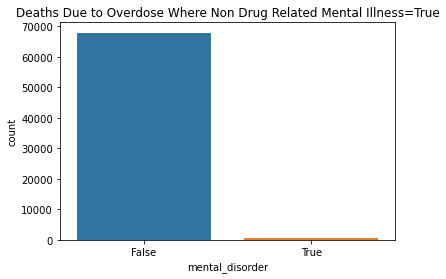

In [8]:
# make a column in overdose called mental_disorder and set it to true if the index from overdose matches the index in mental
# values for mental disorder can appear across 15 different columns.
overdose['mental_disorder'] = overdose.index.isin(mental.index)
overdose['mental_disorder_drugs'] = overdose.index.isin(mental_from_drugs.index)
print(mental.shape)
print(mental_from_drugs.shape)
print(overdose.shape)

print(overdose['mental_disorder'].value_counts())
print(overdose['mental_disorder_drugs'].value_counts())
sns.countplot(x='mental_disorder', data=overdose).set(title="Deaths Due to Overdose Where Non Drug Related Mental Illness=True")


[Text(0.5, 1.0, 'Deaths Due to Overdose Where Drug Related Mental Illness = True')]

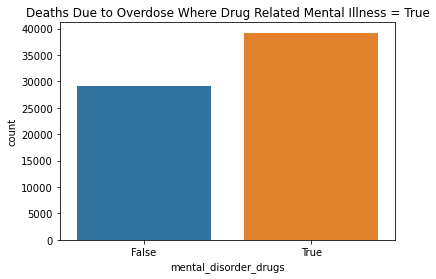

In [9]:
sns.countplot(x='mental_disorder_drugs', data=overdose).set(title='Deaths Due to Overdose Where Drug Related Mental Illness = True')

Out of the 68337 rows containing all people who died of a drug overdose from 1 of the major drugs categories, only 474
also had a mental disorder that wasn't listed as being the result of drug use. This is approximately .007%. However,
when considering only the category where mental disorders are listed as being a result of drug use, the total, not
counting the other mental illness categories, is 57%. This figure leads us to wonder how many of the mental illnesses
listed as being the result of drug use were actually mental illnesses that led to drug use. Further investigation using
data unavailable without prior authorization is required.

Below compares T40 to education, race, occupation.

In [10]:
dfT40 = df[df.apply(lambda row: row.str.contains('T40').any(),axis=1)]

## Age

<AxesSubplot:xlabel='age', ylabel='Count'>

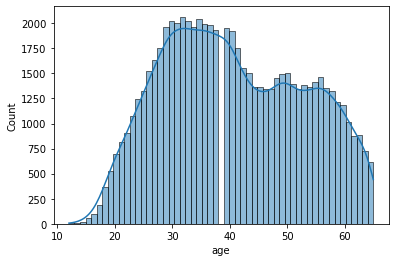

In [11]:
sns.histplot(dfT40['age'], kde=True)

The histogram below displays the number of overdoses per age group. Our initial research had been on
adolescents and young adults, but we decided to include a larger range to gather more insight. We expected
that young adults would be more likely to die from fatal overdose. However, the highest number of overdoses
happened within the 30 - 40 age range.

## Education

<AxesSubplot:xlabel='count', ylabel='education'>

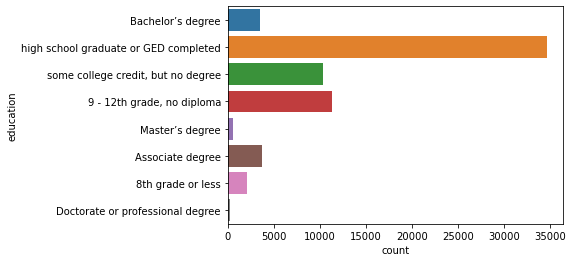

In [12]:
sns.countplot(y='education', data=dfT40)

The graph shows us that a majority of individuals that were high school graduates or completed a GED were more
likely to overdose. Second were individuals that attended high school but did not complete it, no degree. Third
were individuals that had some college credit but no degree. Individuals with a higher level of education were less
likely to overdose compared to the individual with at most some college credit. This shows that there is a slight
relation between overdose and education level. The graph shows that individuals that obtained a  higher education
degree are less likely to overdose.

In [13]:
def is_peer(age, education): 
    if education == "8th grade or less":
        if age <= 15:
            return True
        else:
            return False
    elif education == "9 - 12th grade, no diploma" or education == "high school graduate or GED completed":
        if age >= 13 and age <= 19:
            return True
        else:
            return False
    elif education == "some college credit, but no degree" or education == "Associate degree" or education == "Bachelor’s degree":
        if age >= 17 and age <= 24:
            return True
        else:
            return False
    elif education == "Master’s degree" or education == "Doctorate or professional degree":
        if age >= 21 and age <= 30:
            return True
        else:
            return False

In [14]:
dfT40_education = dfT40
dfT40_education['peer'] = dfT40_education.apply(lambda row: is_peer(row['age'], row['education']), axis=1)

/tmp/ipykernel_8126/3572872763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT40_education['peer'] = dfT40_education.apply(lambda row: is_peer(row['age'], row['education']), axis=1)


<AxesSubplot:xlabel='peer', ylabel='count'>

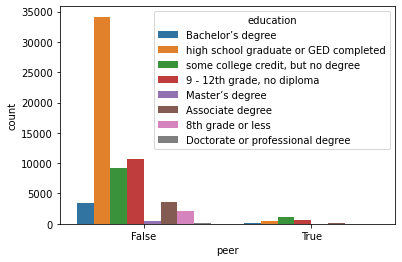

In [15]:
sns.countplot(x='peer', hue='education', data=dfT40_education)

The number of people who overdosed with a high school education level is substantially higher than any other category,
but unsurprisingly because it represents the majority of the average population. By comparing the age at the time of
death to the typical age of students within the categories for levels of education, we were able to determine that even
though most of the decedents had a highschool education level, they did not overdose while close to the average age
range of highschool students.

## Race

<AxesSubplot:xlabel='count', ylabel='race'>

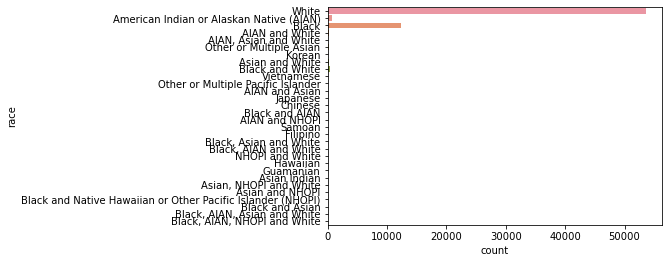

In [16]:
sns.countplot(y='race', data=dfT40)

In [17]:
race = {'race': ["White alone", "Black or African American alone", 
                 "American Indian and Alaska Native alone", "Asian alone", "Native Hawaiian and Other Pacific Islander alone", 
                 "Two or More Races"], 
        'population_percent': [76.3, 13.4, 1.3, 6.0, 0.2, 2.8]}
df_race = pd.DataFrame(data=race)
df_race.set_index('race', inplace=True)

# Source: https://www.census.gov/quickfacts/fact/table/US/RHI125219
df_race

,population_percent
race,
White alone,76.3
Black or African American alone,13.4
American Indian and Alaska Native alone,1.3
Asian alone,6.0
Native Hawaiian and Other Pacific Islander alone,0.2
Two or More Races,2.8


In [18]:
def fit_race(race):
    if race == 'White':
        return 'White alone'
    elif race == 'Black':
        return 'Black or African American alone'
    elif race == 'American Indian or Alaskan Native (AIAN)':
        return 'American Indian and Alaska Native alone'
    elif race == 'Asian Indian' or race == 'Chinese' or race == 'Filipino' or race == 'Japanese' or race == 'Korean' or race == 'Vietnamese' or race == 'Other or Multiple Asian':
        return 'Asian alone'
    elif race == 'Hawaiian' or race == 'Guamanian' or race == 'Samoan' or race == 'Other or Multiple Pacific Islander':
        return 'Native Hawaiian and Other Pacific Islander alone'
    else:
        return 'Two or More Races'

In [19]:
race = {'race': dfT40['race'].unique().tolist()}
dfT40_race = pd.DataFrame(data=race)
counts = dfT40['race'].value_counts()[dfT40_race['race']].to_frame()
dfT40_race = dfT40_race.set_index('race')
dfT40_race['counts'] = counts
dfT40_race = dfT40_race.reset_index()
dfT40_race['race'] = dfT40_race['race'].apply(fit_race)
dfT40_race = dfT40_race.groupby(['race'], as_index=False).agg({'counts': 'sum'})
dfT40_race = dfT40_race.set_index('race')
dfT40_race['T40_percent'] = dfT40_race['counts'] / dfT40_race['counts'].sum() * 100

dfT40_race

,counts,T40_percent
race,,
American Indian and Alaska Native alone,750,1.097502
Asian alone,603,0.882392
Black or African American alone,12373,18.105858
Native Hawaiian and Other Pacific Islander alone,48,0.070240
Two or More Races,886,1.296516
White alone,53677,78.547493


In [20]:
df_race_compare = round(pd.concat([df_race, dfT40_race['T40_percent']], axis=1), 1)
df_race_compare

,population_percent,T40_percent
race,,
White alone,76.3,78.5
Black or African American alone,13.4,18.1
American Indian and Alaska Native alone,1.3,1.1
Asian alone,6.0,0.9
Native Hawaiian and Other Pacific Islander alone,0.2,0.1
Two or More Races,2.8,1.3


In [21]:
chisquare(df_race_compare['T40_percent'], f_exp=df_race_compare['population_percent'])

Power_divergenceResult(statistic=6.931281935919757, pvalue=0.2258013324323115)

Based upon the results of the chi square test, there is no significant effect of race on the rate of fatal overdose when comparing the percentages of overdoses by race to their percentage of representation in the overall population. 

## Occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

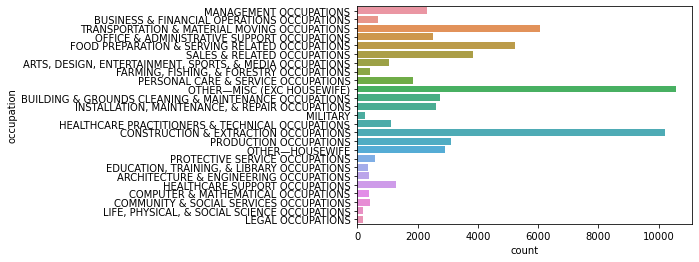

In [22]:
sns.countplot(y='occupation', data=dfT40)

The graph shows us that there are four main occupations that have the most lethal overdoses: Construction and extraction, other/ misc that can be an array of other occupations not mentioned, like housewives, Transportation and material moving, and lastly food preparation and and service. These occupations tend to make less income compared to the other occupations that were analyzed. This shows that income that is based on the occupations that we analyzed might play a role in the lethal overdoses. Individuals that tend to have job that are considered to be higher paying have less individual overdosing. 

[Back to top](#data_analysis_&_results)

<a id='ethics_&_privacy'></a>

# Ethics & Privacy

Information regarding mental illnesses, causes of death, and all other variables involved in our research were
anonymized, and are available to the public through a government website, the Centers for Disease Control.
There was no personal or identifiable information in the dataset to identify individuals, nor were there known
discriminations or biases in the dataset that we currently have. All data provided is as listed on the death
certificate by a coroner or qualified medical health professional. As such, privacy is not a concern. However,
ethics may come into question due to the negative stigma associated with substance abuse problems. Our intentions are
to form connections for the purpose of helping individuals who are potentially at risk. However, it is possible that
any connections we find could be misused and instead become a tool used to stereotype and discriminate against groups
of individuals who are at risk. This is an unfortunate and all too common occurrence in studies such as these.

[Back to top](#ethics_&_privacy)

<a id='conclusion_&_discussion'></a>

# Conclusion & Discussion

We were trying to determine the effect of mental health disorders, race, age, education level, and occupation on the rate of fatal overdose in individuals between the ages of 12-65. We found that mental health disorders which are pre-existing or considered natural in origin have little effect on the incidence of fatal overdose. However, a significant percent, 57%, of fatal overdoses are listed as having a mental disorder that is due to the use of drugs and we question the accuracy and are left wondering how many of the mental illnesses were actually pre-existing. Unfortunately, we are limited by our access to other variables. Race was not shown to be a factor that contributes to overdose when racial categories are compared to their representation in the general population. We found that if you are between the ages of 30-40 individuals were more likely to overdose. Education level mattered also, individuals with a higher education level, having an associate degree and above were least likely to overdose. Compared to individuals with a lower education level. Occupation also seemed to have an important result, individuals that had occupations that often are paid less than the other occupations were more likely to overdose. The occupation might hint at the income levels of individuals. Jobs that are known to be high paying like legal occupations do not have a high number of individuals who lethally overdose. 

[Back to top](#conclusion_&_discussion)

<a id='team_contributions'></a>

# Team Contributions



- Kimberly Johnson: Wrangle Data, analysis, Data cleaning, Decoding, Ethics, and privacy, conclusion, Background
- Yu-Shu Chen: Wrangling, Data Analysis, Decoding, Data cleaning, Ethics, conclusion
- Lesly Naveda: Data Analysis, Data cleaning, Decoding, Ethics, and privacy, conclusion, background
- Duha Kim: Data Analysis, Data cleaning, Overview, Ethics and privacy, Conclusion, background, Prior work



[Back to top](#team_contributions)